# Classifier Accuracy

<br>

<figure>
<img src="https://i.ibb.co/PjwJZD9/Screen-Shot-2019-09-28-at-15-19-47.png" alt="Accuracy vs precision" border="0" width="50%">
  <figcaption style="text-align: center; color: #777; font-weight: bold"><a href="https://en.wikipedia.org/wiki/Accuracy_and_precision">Accuracy and precision - Wikipedia</a></figcaption>
</figure>

### Introduction

In this exercice we are going to find how **accurate** is our **kNN classifier**.<br>
We will also try to differenciate **pro** from **amateur** basket-ball players.

**Dataset:** "../data/Basket_Ball_Players.csv"<br>

**Columns:** <br>
**"Height"**, range [150, 220], height in centimeter <br>
**"3-Pointers"**, range [0, 30], 3-Pointers done in one minutes <br>
**"Pro-Player"**, range [0,1] <br>

### Exercise questions:

1. With **k=1**, is Paul classified as a **Pro-Player**?
2. What is the mean accuracy of our kNN with n=1?
3. What is the weighted f1-score of our kNN with n=1?
4. Fill-in the blanks.

## 1/ Data exploration

As usual before we start working on our model let's **visualise** our **data**.

In [1]:
# The usual imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import Basket_Ball_Players.csv dataset

df = pd.read_csv("../data/Basket_Ball_Players.csv")
df.head()

,Height,3-Pointers,Pro-Player
0,187,24,1
1,210,15,0
2,184,15,0
3,208,19,1
4,175,15,0


In [3]:
# Look at the dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
Height        500 non-null int64
3-Pointers    500 non-null int64
Pro-Player    500 non-null int64
dtypes: int64(3)
memory usage: 11.8 KB


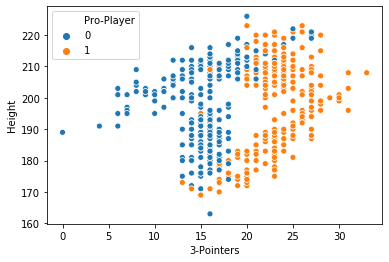

In [4]:
# Create a scatterplot where we can see:
# - his number of 3 pointer, on the X-axis
# - the height of the player, on the Y-axis
# - if he is a Pro-Player, with the color of the dot.

sns.scatterplot(x="3-Pointers", y="Height", data=df, hue="Pro-Player")

We should see a clear distinction between the pro and the amateur player.

## 2/ Model creation

Let's use the **kNN model** from scikit-learn to **predict** if a player is **pro** or an **amateur**. <br>
This time we will also take a look at the **prediction** **accuracy**.

The player we want to classify here is be called **Paul**, here is his attributes: `{"Height": [209], "3-Pointers": [20]}`

So, let's follow these steps:
1. **Split** the data with a **trainning** and **test** dataset. [[ DOC ] - scikit-learn.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. **Train** the model with **k=1** and the **trainning data**. [[ DOC ] - scikit-learn.KNeighborgsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. **Classify** Paul.

In [5]:
# Split the data with a trainning and test dataset
#   Please use `test_size=0.33, random_state=42` as parameter of your train_test_split()
#   That way we all have the same results

from sklearn.model_selection import train_test_split

X = df[['Height', '3-Pointers']]
y = df[['Pro-Player']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Train the model with k=1 and the trainning data

from sklearn.neighbors import KNeighborsClassifier

one_neigh = KNeighborsClassifier(n_neighbors=1)
one_neigh.fit(X_train, y_train)

/Users/gaetan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### With k=1, is Paul classified as a Pro-Player?

In [14]:
# Classify Paul.
paul = pd.DataFrame(data={"Height": [209], "3-Pointers": [20]})
one_neigh.predict(paul)

array([1])

In [8]:
question_paul_is_pro = True # enter True or False

## 3/ Model metrics

Can we really **trust** this **prediction**?<br>
To answer that question we need to **check** the **accuracy** of our model with our **test data**.<br>
[[ DOC ] - scikit-learn.classification_report](
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)<br>
[[ DOC ] - scikit-learn.KNeighborsClassifier.score ](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score)

In [15]:
# Check the score of our model with our test data
one_neigh.score(X_test, y_test)

0.7878787878787878

In [10]:
# Check the classification report of our model with our test data

from sklearn.metrics import classification_report

y_prediction = one_neigh.predict(X_test)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        90
           1       0.78      0.75      0.76        75

    accuracy                           0.79       165
   macro avg       0.79      0.78      0.79       165
weighted avg       0.79      0.79      0.79       165



### What is the mean accuracy of our kNN with n=1?

In [11]:
question_mean_accuracy = 0.79 # enter the mean accuracy found for k=1 (rounded to the second decimal, ex: 0.23)

### What is the weighted f1-score of our kNN with n=1?

In [12]:
question_f1_score = 0.79 # enter the f1-score found for k=1 (rounded to the second decimal, ex: 0.23)

### Fill-in the blanks 🤓📚

Let's make sure we **understand** each **metrics** in this **classification report**.<br>
Here is some usefull **documentation**:<br>
- [[ DOC ] Metrics - Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support)
- [[ DOC ] F1-Score - Wikipedia](https://en.wikipedia.org/wiki/F1_score)
- [[ DOC ] Accuracy and precision - Wikipedia](https://en.wikipedia.org/wiki/Accuracy_and_precision)
- [[ DOC ] Precision and recall - Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)

*tips: each word can only be used once*

In [16]:
answer_precision = "precision"
answer_support = "support"
answer_recall = "recall"
answer_accuracy = "accuracy"
answer_f1_score = "f1-score"

question_metrics_1 = f"{answer_support} is the number of occurrences of each class in y_true."
question_metrics_2 = f"{answer_f1_score} is the harmonic mean of the precision and recall."
question_metrics_3 = f"{answer_recall} is defined as (true_positive / true_positive + false_negative)"
question_metrics_4 = f"{answer_precision} is a description of random errors, a measure of statistical variability."
question_metrics_5 = f"{answer_accuracy} is a description of systematic errors, a measure of statistical bias."

### Would you trust this model with his current perfomances?

Acctually this is a quite challenging question.<br>
An intresting **answer** is given by **Corrin Lakeland** on Quora:
>  I believe a model is ready for production when it **outperforms the status quo** and, most important, **doors not** generate **nasty surprises**.<br> <br>Corrin Lakeland, PhD Computer Science, University of Otago (2006)

You can read more answers about this topic here:<br> [Quora - How do you know when your machine learning model is good enough to be put into production](https://www.quora.com/How-do-you-know-when-your-machine-learning-model-is-good-enough-to-be-put-into-production)